In [1]:
import os
import torch
import json
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from datasets import Dataset
from PIL import Image
import numpy as np
import torchvision.transforms as transforms

In [50]:
# Path to the clients_dataset folder
client_dataset_path = r"/Users/amankumar/Documents/MS/Sem3/Masters Project/FedRRT_CD/src/data/clients_dataset"
# No. of Clients
num_clients = len([f for f in os.listdir(client_dataset_path) if os.path.isdir(os.path.join(client_dataset_path, f))])
num_clients

10

In [3]:
# List to store the client datasets
client_train_datasets = {}
client_val_dataset = {}

# Loop over each client folder (client_0 to client_9)
for client_id in range(num_clients):
    client_folder = f"client_{client_id}"
    
    train_file = os.path.join(client_dataset_path, client_folder, "train_data.pt")
    val_file = os.path.join(client_dataset_path, client_folder, "val_data.pt")
    
    # Load data for each client
    train_data = torch.load(train_file)
    val_data = torch.load(val_file)
    
    # Create a Dataset for the client
    client_train_datasets[client_folder] = pd.DataFrame({
        'image': [train_data[i]['image'] for i in range(len(train_data))],
        'label': [train_data[i]['label'] for i in range(len(train_data))]
    })
    client_val_dataset[client_folder] = pd.DataFrame({
        'image': [val_data[i]['image'] for i in range(len(val_data))],
        'label': [val_data[i]['label'] for i in range(len(val_data))]
    })

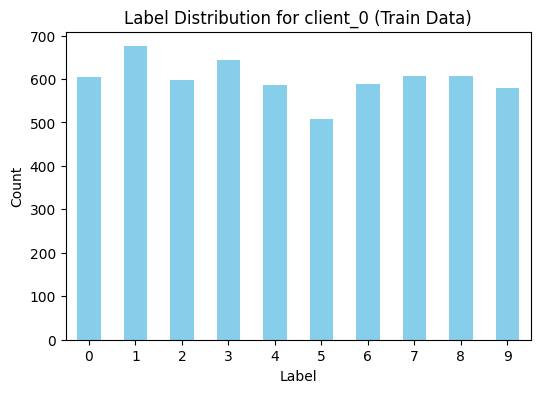

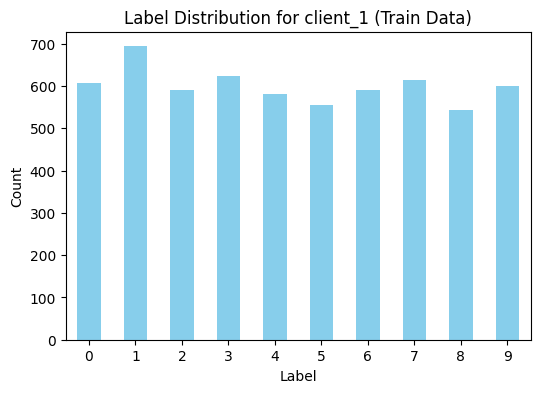

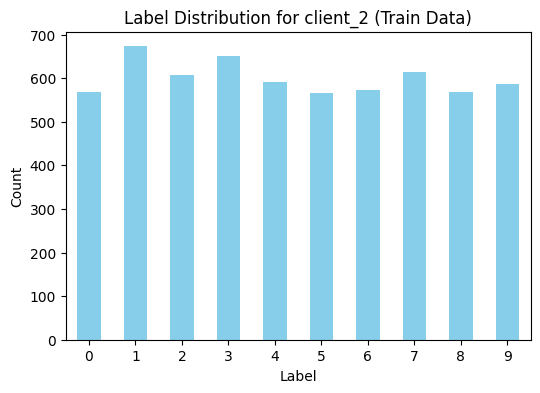

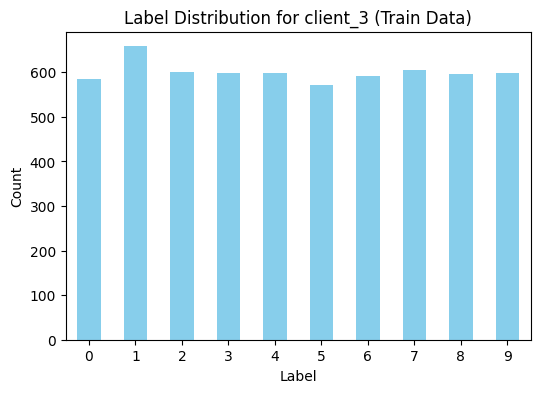

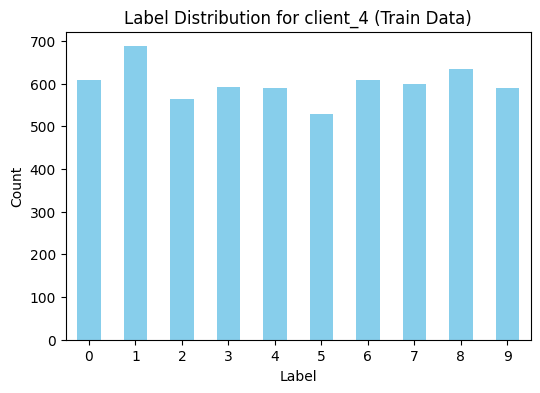

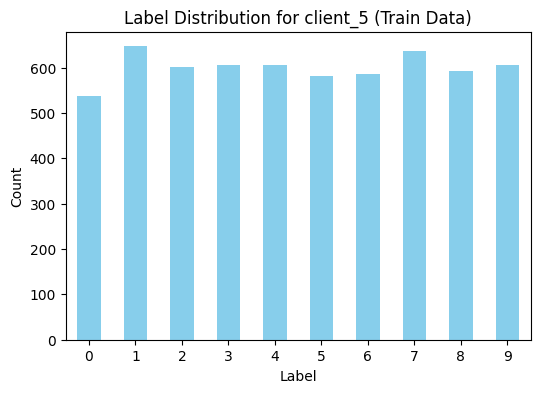

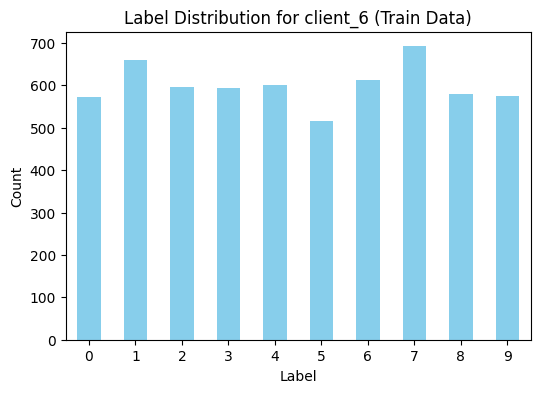

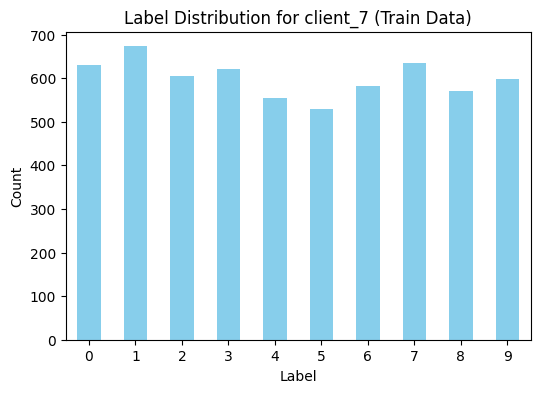

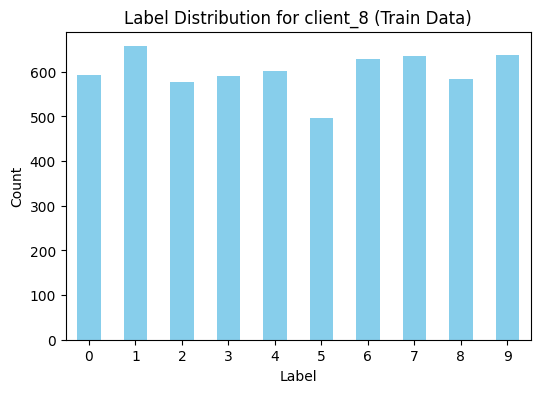

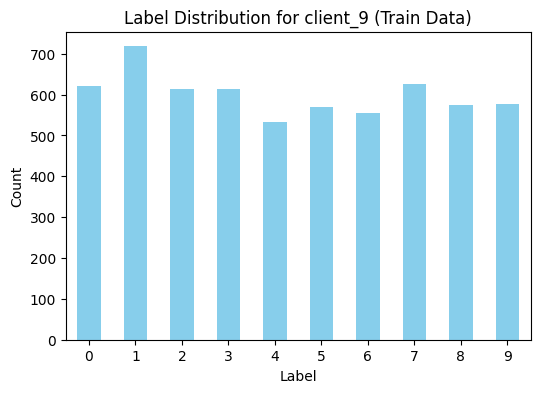

In [4]:
# Now plot the label distribution for each client
for client_folder, train_df in client_train_datasets.items():
    plt.figure(figsize=(6, 4))
    train_df['label'].value_counts().sort_index().plot(kind='bar', color='skyblue')
    plt.title(f'Label Distribution for {client_folder} (Train Data)')
    plt.xlabel('Label')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.show()

In [5]:
# to_pil = transforms.ToPILImage()
# pil_image = to_pil(df_train.image[0])

# # Show the image
# pil_image.show()

In [6]:
client_train_datasets['client_1'].label.value_counts()

1    694
3    623
7    614
0    607
9    600
2    592
6    590
4    581
5    555
8    544
Name: label, dtype: int64

# Index Validation

In [7]:
drift_client_dataset_path = r"/Users/amankumar/Documents/MS/Sem3/Masters Project/FedRRT_CD/src/data/clients_drift_dataset_indexes"
json_folder = [f for f in os.listdir(drift_client_dataset_path) if os.path.isdir(os.path.join(drift_client_dataset_path, f))]
num_drifted_clients_json = len(json_folder)
num_drifted_clients_json

3

In [8]:
drift_client_train_json = {}
drift_client_val_json = {}

for folder in json_folder:
    client_folder = folder
    
    train_json_file = os.path.join(drift_client_dataset_path, client_folder, "train_data.json")
    val_json_file = os.path.join(drift_client_dataset_path, client_folder, "val_data.json")
    
    with open(train_json_file, 'r') as file:
        train_indices_list = json.load(file)
    drift_client_train_json[client_folder] = train_indices_list
    with open(val_json_file, 'r') as file:
        val_indices_list = json.load(file)
    drift_client_val_json[client_folder] = val_indices_list

In [9]:
len(drift_client_train_json['client_1'])

1323

In [10]:
len(set(drift_client_train_json['client_1']))

1062

In [11]:
len(drift_client_val_json['client_1'])

1349

In [12]:
len(set(drift_client_val_json['client_1']))

422

# Case 1: Client Drifted DataSet

In [13]:
drift_client_dataset_path = r"/Users/amankumar/Documents/MS/Sem3/Masters Project/FedRRT_CD/src/data/clients_drifted_dataset"
drift_folder = [f for f in os.listdir(drift_client_dataset_path) if os.path.isdir(os.path.join(drift_client_dataset_path, f))]
num_drifted_clients = len(drift_folder)
num_drifted_clients

3

In [14]:
# List to store the client datasets
drift_client_train_datasets = {}
drift_client_val_dataset = {}

# Loop over each client folder (client_0 to client_9)
for folder in drift_folder:
    client_folder = folder
    
    train_file = os.path.join(drift_client_dataset_path, client_folder, "train_data.pt")
    val_file = os.path.join(drift_client_dataset_path, client_folder, "val_data.pt")
    
    # Load data for each client
    train_data = torch.load(train_file)
    val_data = torch.load(val_file)
    
    # Create a Dataset for the client
    drift_client_train_datasets[client_folder] = pd.DataFrame({
        'image': [train_data[i]['image'] for i in range(len(train_data))],
        'label': [train_data[i]['label'] for i in range(len(train_data))]
    })
    drift_client_val_dataset[client_folder] = pd.DataFrame({
        'image': [val_data[i]['image'] for i in range(len(val_data))],
        'label': [val_data[i]['label'] for i in range(len(val_data))]
    })

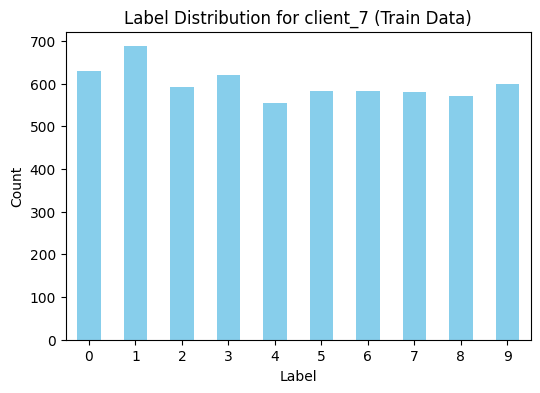

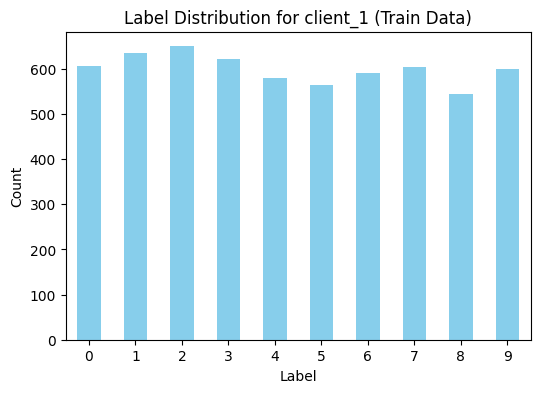

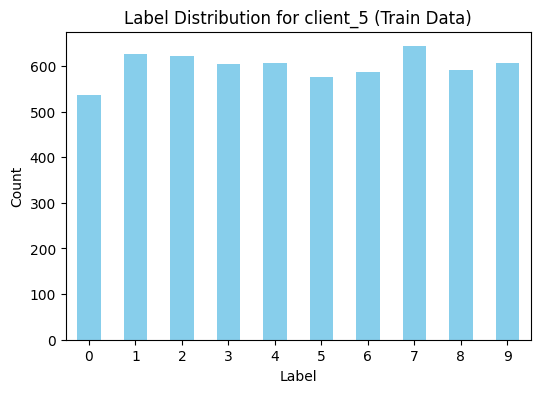

In [15]:
# Now plot the label distribution for each client
for client_folder, train_df in drift_client_train_datasets.items():
    plt.figure(figsize=(6, 4))
    train_df['label'].value_counts().sort_index().plot(kind='bar', color='skyblue')
    plt.title(f'Label Distribution for {client_folder} (Train Data)')
    plt.xlabel('Label')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.show()

In [16]:
drift_client_train_datasets['client_1'].label.value_counts()

2    650
1    636
3    623
0    607
7    604
9    600
6    590
4    581
5    565
8    544
Name: label, dtype: int64

### Index data and dift data intersection

In [17]:
drift_client_train_datasets['client_1'].iloc[list(dict.fromkeys(drift_client_train_json['client_1']))]

,image,label
4280,"[[[tensor(-1.), tensor(-1.), tensor(-1.), tens...",2
4006,"[[[tensor(-1.), tensor(-1.), tensor(-1.), tens...",5
1613,"[[[tensor(-1.), tensor(-1.), tensor(-1.), tens...",2
700,"[[[tensor(-1.), tensor(-1.), tensor(-1.), tens...",7
5109,"[[[tensor(-1.), tensor(-1.), tensor(-1.), tens...",7
...,...,...
1896,"[[[tensor(-1.), tensor(-1.), tensor(-1.), tens...",7
283,"[[[tensor(-1.), tensor(-1.), tensor(-1.), tens...",5
5905,"[[[tensor(-1.), tensor(-1.), tensor(-1.), tens...",2
3052,"[[[tensor(-1.), tensor(-1.), tensor(-1.), tens...",2


In [18]:
drift_client_train_datasets['client_1'].iloc[list(dict.fromkeys(drift_client_train_json['client_1']))].label.value_counts()

2    292
5    273
7    263
1    234
Name: label, dtype: int64

In [19]:
drift_client_train_datasets['client_1']['label'][1910]

5

In [20]:
to_pil = transforms.ToPILImage()
pil_image = to_pil(drift_client_train_datasets['client_1']['image'][1910])

# Show the image
pil_image.show()

# Case 2: Client Remaining Dataset

In [64]:
drift_rem_client_dataset_path = r"/Users/amankumar/Documents/MS/Sem3/Masters Project/FedRRT_CD/src/data/clients_remaining_dataset"
drift_rem_folder = [f for f in os.listdir(drift_rem_client_dataset_path) if os.path.isdir(os.path.join(drift_rem_client_dataset_path, f))]
num_rem_drifted_clients = len(drift_rem_folder)
num_rem_drifted_clients

3

In [65]:
# List to store the client datasets
drift_rem_client_train_datasets = {}
drift_rem_client_val_dataset = {}

# Loop over each client folder (client_0 to client_9)
for folder in drift_rem_folder:
    client_folder = folder
    
    train_file = os.path.join(drift_rem_client_dataset_path, client_folder, "train_data.pt")
    val_file = os.path.join(drift_rem_client_dataset_path, client_folder, "val_data.pt")
    
    # Load data for each client
    train_data = torch.load(train_file)
    val_data = torch.load(val_file)
    
    # Create a Dataset for the client
    drift_rem_client_train_datasets[client_folder] = pd.DataFrame({
        'image': [train_data[i]['image'] for i in range(len(train_data))],
        'label': [train_data[i]['label'] for i in range(len(train_data))]
    })
    drift_rem_client_val_dataset[client_folder] = pd.DataFrame({
        'image': [val_data[i]['image'] for i in range(len(val_data))],
        'label': [val_data[i]['label'] for i in range(len(val_data))]
    })

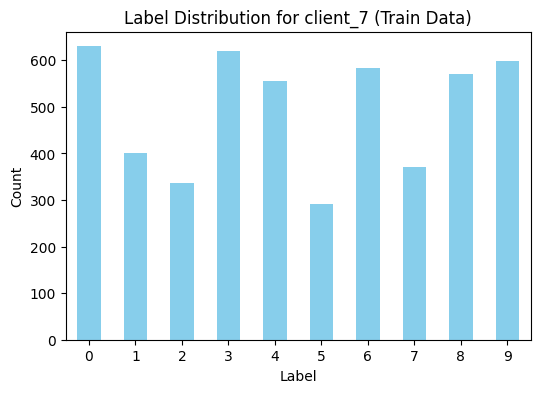

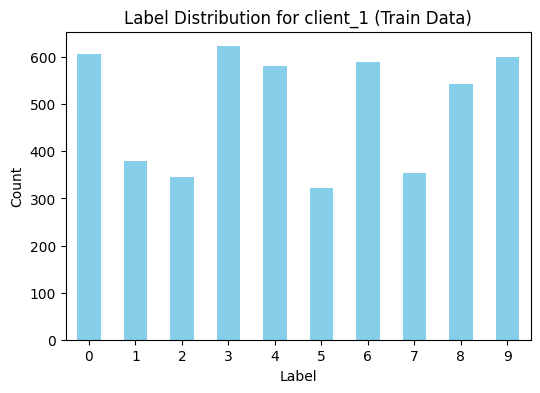

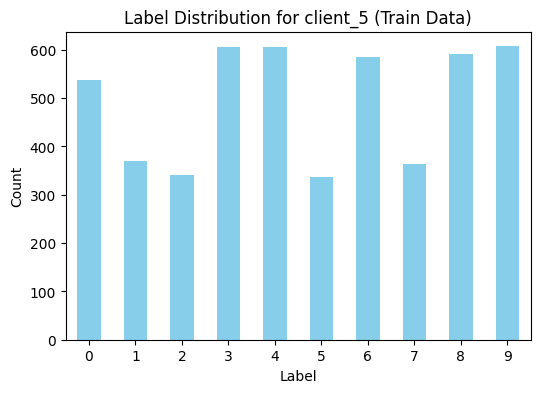

In [66]:
# Now plot the label distribution for each client
for client_folder, train_df in drift_rem_client_train_datasets.items():
    plt.figure(figsize=(6, 4))
    train_df['label'].value_counts().sort_index().plot(kind='bar', color='skyblue')
    plt.title(f'Label Distribution for {client_folder} (Train Data)')
    plt.xlabel('Label')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.show()

In [67]:
drift_rem_client_train_datasets['client_1'].label.value_counts()

3    623
0    607
9    600
6    590
4    581
8    544
1    380
7    354
2    345
5    323
Name: label, dtype: int64

In [68]:
drift_rem_client_train_datasets['client_1'].shape

(4947, 2)

### Index data and remaning data intersection

In [69]:
drift_rem_set = list(dict.fromkeys(drift_client_val_json['client_1']))
drift_rem_client_val_dataset['client_1'].iloc[drift_rem_set].label.value_counts()

1    133
2    105
7     94
5     89
Name: label, dtype: int64

# Plots

### Client distribution

In [91]:
def plot_client_label_distribution(client_train_datasets, drift_client_train_datasets, drift_rem_client_train_datasets, client_id='client_1'):
    if client_id not in client_train_datasets or \
       client_id not in drift_client_train_datasets or \
       client_id not in drift_rem_client_train_datasets:
        print(f"Client ID '{client_id}' not found in one or more datasets.")
        return

    before_swap = client_train_datasets[client_id]['label'].value_counts().sort_index()
    after_swap = drift_client_train_datasets[client_id]['label'].value_counts().sort_index()
    after_removal = drift_rem_client_train_datasets[client_id]['label'].value_counts().sort_index()

    all_labels = sorted(set(before_swap.index) | set(after_swap.index) | set(after_removal.index))
    before_swap = before_swap.reindex(all_labels, fill_value=0)
    after_swap = after_swap.reindex(all_labels, fill_value=0)
    after_removal = after_removal.reindex(all_labels, fill_value=0)

    sns.set_theme(style="whitegrid")
    colors = sns.color_palette("muted")

    x = np.arange(len(all_labels))
    width = 0.25

    plt.figure(figsize=(8, 4))

    plt.bar(x - width, before_swap, width, label='Before label swap', color=colors[0], edgecolor='black', linewidth=0.7)
    plt.bar(x, after_swap, width, label='After abrupt drift (1<->2, 5<->7)', color=colors[1], edgecolor='black', linewidth=0.7)
    plt.bar(x + width, after_removal, width, label='After swapped labels removal', color=colors[2], edgecolor='black', linewidth=0.7)

    plt.xlabel('Label', fontsize=12, fontweight='bold')
    plt.ylabel('Samples', fontsize=12, fontweight='bold')
    plt.xticks(x, all_labels, fontsize=10, fontweight='bold')
    plt.yticks(fontsize=10, fontweight='bold')

    plt.legend(title="Distributions", loc="center", bbox_to_anchor=(1, 1), fontsize=10)
    plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)

    plt.tight_layout()
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    plt.show()

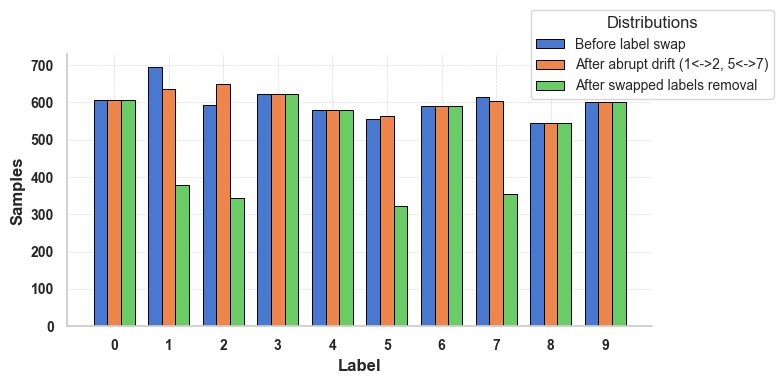

In [92]:
plot_client_label_distribution(client_train_datasets, drift_client_train_datasets, drift_rem_client_train_datasets)

### Local Models 

In [2]:
# Define the path to the log directory
plot_dir = "/Users/amankumar/Documents/MS/Sem3/Masters Project/FedRRT_CD/src/plots_mnist"

In [3]:
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

client_colors = sns.color_palette("tab10", 10)

def plot_clients(mode):
    file_path = os.path.join(plot_dir, f"results_{mode}.json")
    with open(file_path, 'r') as file:
        data = json.load(file)

    sns.set_theme(style="whitegrid")

    client_ids = sorted(map(int, data.keys()))
    color_map = {str(client_id): client_colors[i % len(client_colors)] for i, client_id in enumerate(client_ids)}

    plt.figure(figsize=(6.4, 3.6))  # IEEE double-column width (~6.4 x 3.6 in)

    for client_id in map(str, client_ids):
        rounds = range(1, len(data[client_id]["accuracy"]) + 1)
        accuracies = [acc * 100 for acc in data[client_id]["accuracy"]]
        plt.plot(rounds, accuracies,
                 linestyle='-', linewidth=1.2,
                 color=color_map[client_id],
                 label=f"Client {client_id}")

    # Axis and title
    plt.xlabel("Communication Rounds", fontsize=9, fontweight='bold')
    plt.ylabel("Accuracy (%)", fontsize=9, fontweight='bold')
    plt.title("Client-wise Accuracy Over Rounds", fontsize=10, fontweight='bold')

    # X-ticks control
    total_rounds = len(next(iter(data.values()))["accuracy"])
    plt.xticks(ticks=np.linspace(1, total_rounds, 10, dtype=int), fontsize=8)
    plt.yticks(fontsize=8)

    # Optional Y-axis limit
    plt.ylim(40, 100)

    # Grid
    plt.grid(True, axis='y', linestyle='--', linewidth=0.5, alpha=0.6)

    # Font settings for IEEE
    plt.rcParams["font.family"] = "serif"
    plt.rcParams["font.serif"] = ["Times New Roman"]

    # Legend
    plt.legend(title="Clients", fontsize=7, title_fontsize=8, loc='center left',
               bbox_to_anchor=(1.02, 0.5), frameon=False)

    plt.tight_layout()
    plt.savefig(f"client_accuracy_ieee_{mode}.pdf", format='pdf', bbox_inches='tight')
    plt.show()


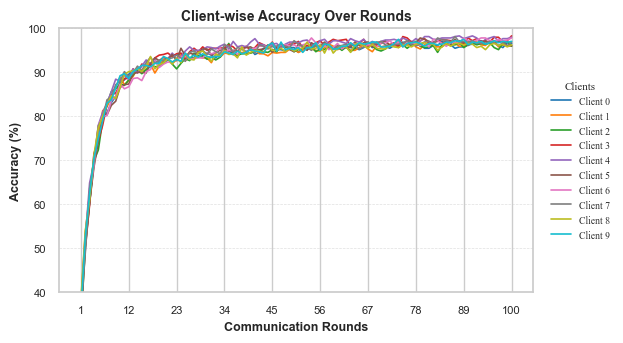

In [4]:
plot_clients("fl-case")

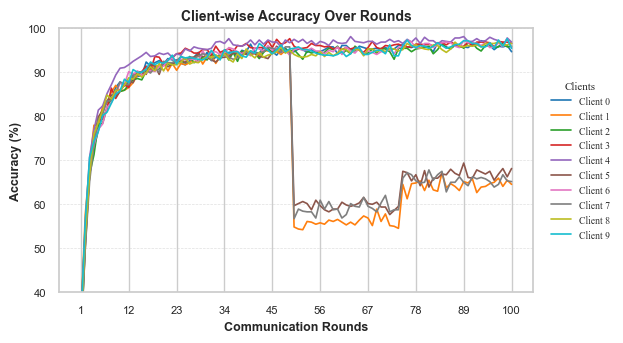

In [5]:
plot_clients("drift-case")

In [6]:
plot_clients("retraining-case")

FileNotFoundError: [Errno 2] No such file or directory: '/Users/amankumar/Documents/MS/Sem3/Masters Project/FedRRT_CD/src/plots_mnist/results_retraining-case.json'

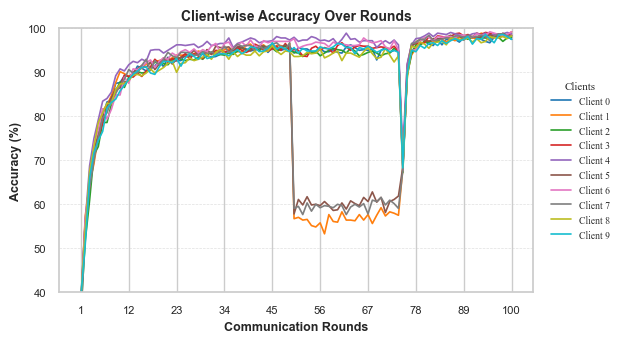

In [7]:
plot_clients("rapid-retraining-case")

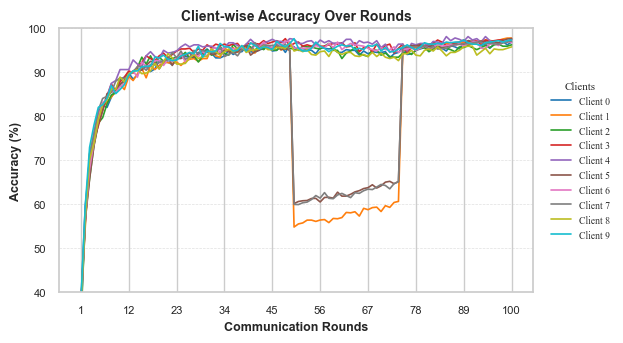

In [8]:
plot_clients("fedau-case")

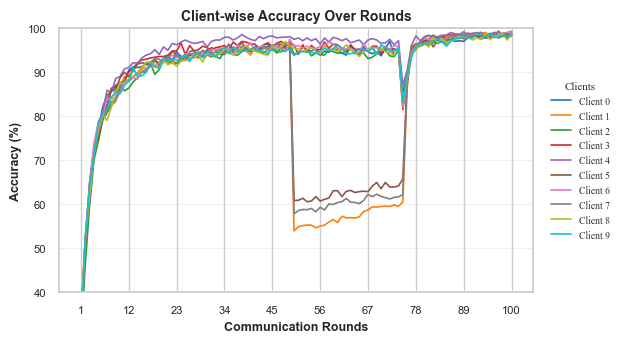

In [9]:
plot_clients("fluid-case")

### Global Model

In [10]:
# Get list of all JSON files
json_files = [f for f in os.listdir(plot_dir) if f.endswith(".json")]

# Store global accuracy and loss per file
global_accuracies = []
global_losses = []
labels = []

# Process each JSON file
for file in json_files:
    file_path = os.path.join(plot_dir, file)
    
    # Extract meaningful label from filename
    label = file.replace("results_", "").replace(".json", "")
    label = '-'.join([word.capitalize() for word in label.split('-')]) 
    labels.append(label)
    
    # Load JSON data
    with open(file_path, "r") as f:
        data = json.load(f)
    
    # Find the number of rounds from any client entry
    num_rounds = len(next(iter(data.values()))["accuracy"])
    
    # Initialize lists to store round-wise accuracy and loss
    round_accuracies = [[] for _ in range(num_rounds)]
    round_losses = [[] for _ in range(num_rounds)]
    
    # Collect accuracy and loss for each round across all clients
    for client_values in data.values():
        for i in range(num_rounds):
            round_accuracies[i].append(client_values["accuracy"][i])
            round_losses[i].append(client_values["loss"][i])
    
    # Compute average accuracy and loss for each round (global model)
    avg_accuracies = [np.mean(round_acc) for round_acc in round_accuracies]
    avg_losses = [np.mean(round_loss) for round_loss in round_losses]
    
    # Store results
    global_accuracies.append(avg_accuracies)
    global_losses.append(avg_losses)

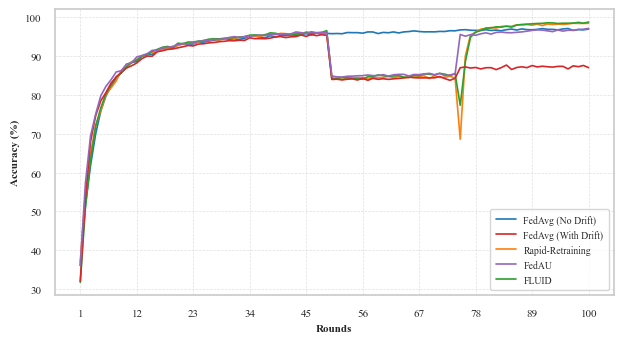

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np  # Ensure this is imported if not already

# Set seaborn color palette
client_colors = sns.color_palette("tab10", len(global_accuracies))

# Global plot style
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times New Roman"],
    "axes.titlesize": 8,
    "axes.labelsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    "legend.fontsize": 7,
})

# Plot global accuracy
plt.figure(figsize=(6.4, 3.6))  # IEEE double-column size

for i, acc in enumerate(global_accuracies):
    rounds = range(1, len(acc) + 1)
    accuracies = [a * 100 for a in acc]
    plt.plot(rounds, accuracies,
             linestyle='-', linewidth=1.2,
             color=client_colors[i],
             label=labels[i])

# Axis labels
plt.xlabel("Rounds", fontweight='bold')
plt.ylabel("Accuracy (%)", fontweight='bold')

# Ticks
plt.xticks(
    ticks=np.linspace(1, len(global_accuracies[0]), 10, dtype=int)
)
plt.yticks()

# Grid
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.6)

# Legend reordering and relabeling
desired_order = ["Fl-Case", "Drift-Case", "Retraining-Case", "Rapid-Retraining-Case", "Fedau-Case", "Fluid-Case"]
handles, label_texts = plt.gca().get_legend_handles_labels()
label_handle_map = dict(zip(label_texts, handles))
ordered_handles = [label_handle_map[l] for l in desired_order if l in label_handle_map]
ordered_labels = [
    "FedAvg (No Drift)" if l == "Fl-Case" else
    "FedAvg (With Drift)" if l == "Drift-Case" else
    "Rapid-Retraining" if l == "Rapid-Retraining-Case" else
    "FedAU" if l == "Fedau-Case" else
    "FLUID" if l == "Fluid-Case" else
    l for l in desired_order if l in label_handle_map
]

# Legend INSIDE plot, upper-left
plt.legend(ordered_handles, ordered_labels,
           title_fontsize=8, loc="lower right", frameon=True,
           framealpha=0.8, borderpad=0.6)

plt.tight_layout()
# plt.savefig("global_accuracy_ieee.pdf", format="pdf", bbox_inches="tight")
plt.show()


In [242]:
global_accuracies

[[0.36125,
  0.515625,
  0.6181249999999999,
  0.69953125,
  0.75828125,
  0.79703125,
  0.82125,
  0.8423437500000001,
  0.85671875,
  0.87671875,
  0.8832812499999999,
  0.8848437500000002,
  0.89921875,
  0.90328125,
  0.90390625,
  0.9121874999999999,
  0.91921875,
  0.9204687500000001,
  0.920625,
  0.92734375,
  0.9310937499999999,
  0.9296875,
  0.9303125000000001,
  0.9353125,
  0.93515625,
  0.9378125,
  0.9400000000000001,
  0.94140625,
  0.9442187500000001,
  0.9423437499999998,
  0.9400000000000001,
  0.9425000000000001,
  0.9446875,
  0.9517187500000001,
  0.95140625,
  0.9478125000000001,
  0.9457812500000001,
  0.9518749999999999,
  0.9481250000000001,
  0.9521875,
  0.9520312499999999,
  0.95375,
  0.9529687499999999,
  0.954375,
  0.9571874999999999,
  0.9534374999999999,
  0.95875,
  0.95546875,
  0.9576562500000001,
  0.9568750000000001,
  0.95734375,
  0.9567187500000001,
  0.9598437499999999,
  0.9595312500000001,
  0.9595312500000001,
  0.9581250000000001,
  0.961

In [243]:
indexed_accuracies = [
    [(i + 1, acc * 100) for i, acc in enumerate(run)]
    for run in global_accuracies
]
indexed_accuracies

[[(1, 36.125),
  (2, 51.5625),
  (3, 61.81249999999999),
  (4, 69.953125),
  (5, 75.828125),
  (6, 79.703125),
  (7, 82.125),
  (8, 84.234375),
  (9, 85.671875),
  (10, 87.671875),
  (11, 88.32812499999999),
  (12, 88.48437500000001),
  (13, 89.921875),
  (14, 90.328125),
  (15, 90.390625),
  (16, 91.21875),
  (17, 91.921875),
  (18, 92.046875),
  (19, 92.0625),
  (20, 92.734375),
  (21, 93.109375),
  (22, 92.96875),
  (23, 93.03125000000001),
  (24, 93.53125),
  (25, 93.515625),
  (26, 93.78125),
  (27, 94.0),
  (28, 94.140625),
  (29, 94.42187500000001),
  (30, 94.23437499999999),
  (31, 94.0),
  (32, 94.25000000000001),
  (33, 94.46875),
  (34, 95.171875),
  (35, 95.140625),
  (36, 94.78125),
  (37, 94.57812500000001),
  (38, 95.18749999999999),
  (39, 94.81250000000001),
  (40, 95.21875),
  (41, 95.20312499999999),
  (42, 95.375),
  (43, 95.29687499999999),
  (44, 95.4375),
  (45, 95.71874999999999),
  (46, 95.34375),
  (47, 95.875),
  (48, 95.546875),
  (49, 95.76562500000001),
  

### Drifted clients plots

In [33]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

client_colors = sns.color_palette("tab10", 10)

def plot_avg_drifted_clients():
    # Global IEEE-compliant style
    plt.rcParams.update({
        "font.family": "serif",
        "font.serif": ["Times New Roman"],
        "axes.titlesize": 8,
        "axes.labelsize": 8,
        "xtick.labelsize": 8,
        "ytick.labelsize": 8,
        "legend.fontsize": 7,
        "legend.title_fontsize": 8
    })

    sns.set_theme(style="whitegrid")
    selected_clients = {"1", "5", "7"}
    result_files = [f for f in os.listdir(plot_dir) if f.startswith("results_") and f.endswith(".json")]

    desired_order = ["Retraining-Case", "Rapid-Retraining-Case", "FedAU-Case", "Fluid-Case"]
    plot_data = []

    plt.figure(figsize=(6.4, 3.6))  # IEEE double-column width

    for i, file_name in enumerate(result_files):
        file_path = os.path.join(plot_dir, file_name)
        with open(file_path, 'r') as file:
            data = json.load(file)

        accuracies = [data[client_id]["accuracy"] for client_id in selected_clients if client_id in data]
        avg_accuracies = [sum(acc[i] for acc in accuracies) / len(accuracies) for i in range(len(accuracies[0]))]
        avg_accuracies = [acc * 100 for acc in avg_accuracies]

        label = file_name.replace("results_", "").replace(".json", "").title()
        label = "FedAU-Case" if label == "Fedau-Case" else label

        if label in desired_order:
            plot_data.append((label, avg_accuracies, client_colors[i % len(client_colors)]))

    plot_data.sort(key=lambda x: desired_order.index(x[0]))

    for label, avg_accuracies, color in plot_data:
        rounds = range(1, len(avg_accuracies) + 1)
        plt.plot(rounds, avg_accuracies, linestyle='-', linewidth=1.2, color=color, label=label)

    plt.xlabel("Rounds", fontweight='bold')
    plt.ylabel("Accuracy (%)", fontweight='bold')
    # Optional: remove title to match IEEE standards
    # plt.title("Avg. Accuracy of Drifted Clients", fontsize=8, fontweight='bold')

    plt.xticks(np.arange(0, 101, 10))
    plt.yticks()
    plt.xlim(0, 105)
    plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.6)

    # Put legend inside top-left
    plt.legend() loc="lower right", frameon=True,
               framealpha=0.8, borderpad=0.6)

    plt.tight_layout()
    # plt.savefig("drifted_clients_accuracy_ieee.pdf", format="pdf", bbox_inches="tight")
    plt.show()


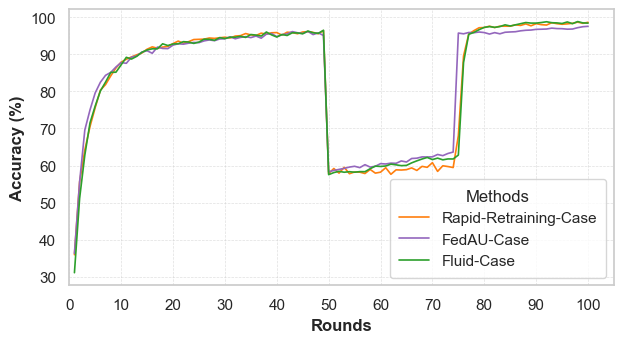

In [34]:
plot_avg_drifted_clients()

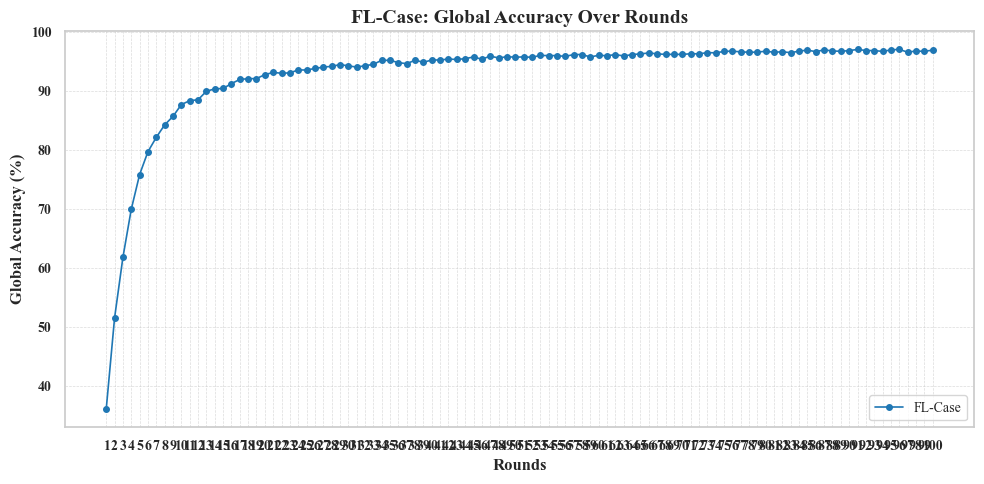

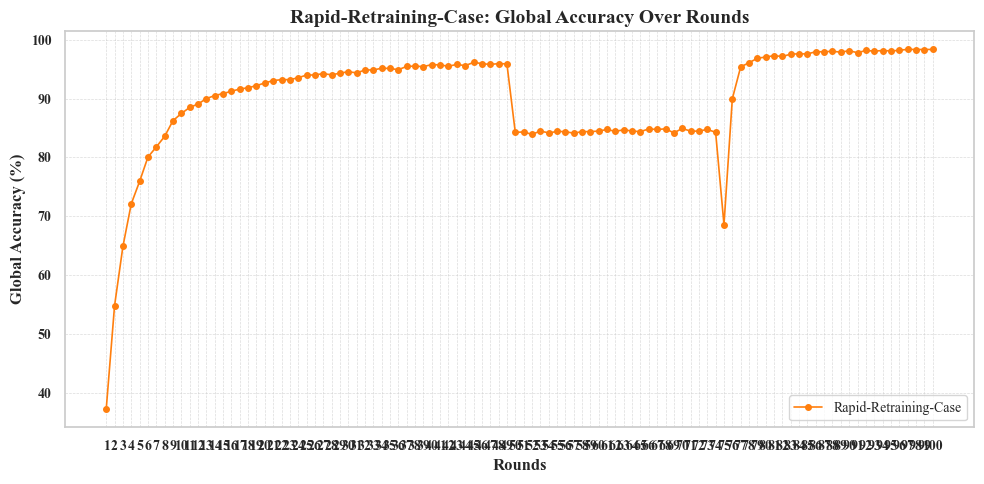

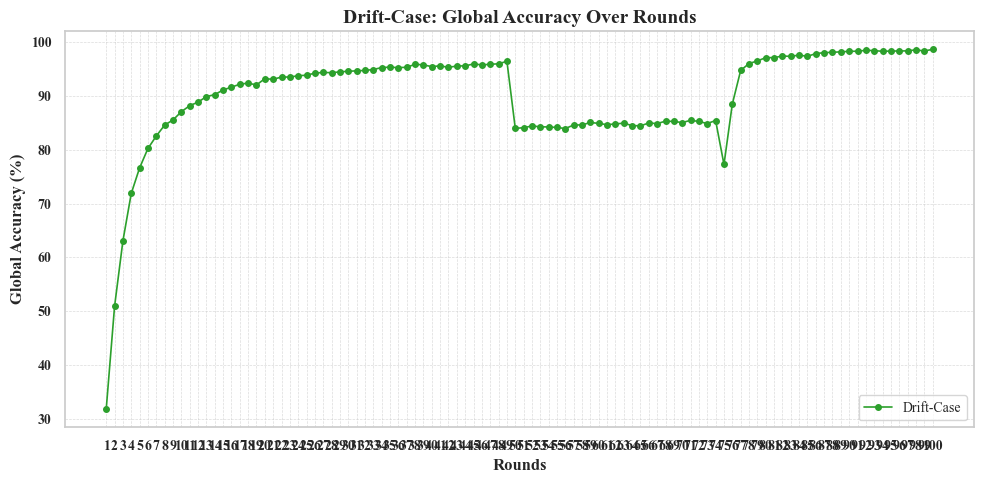

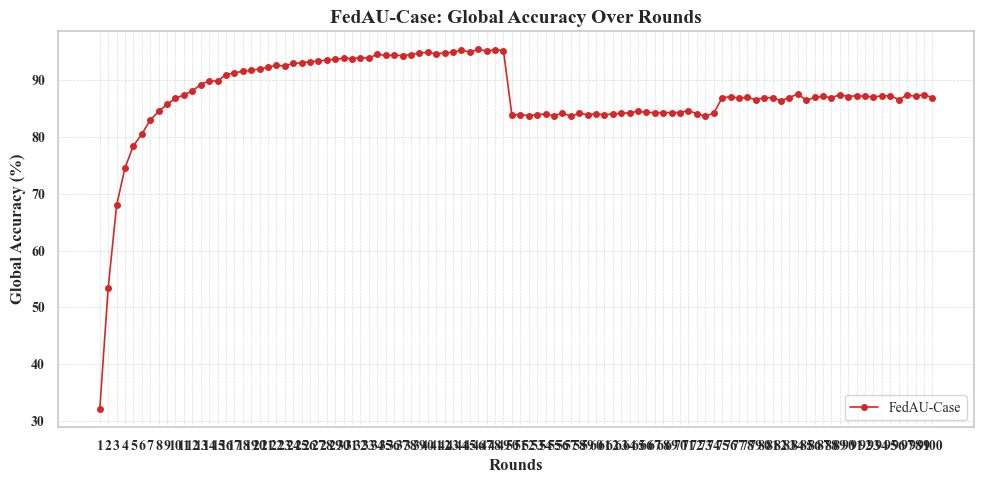

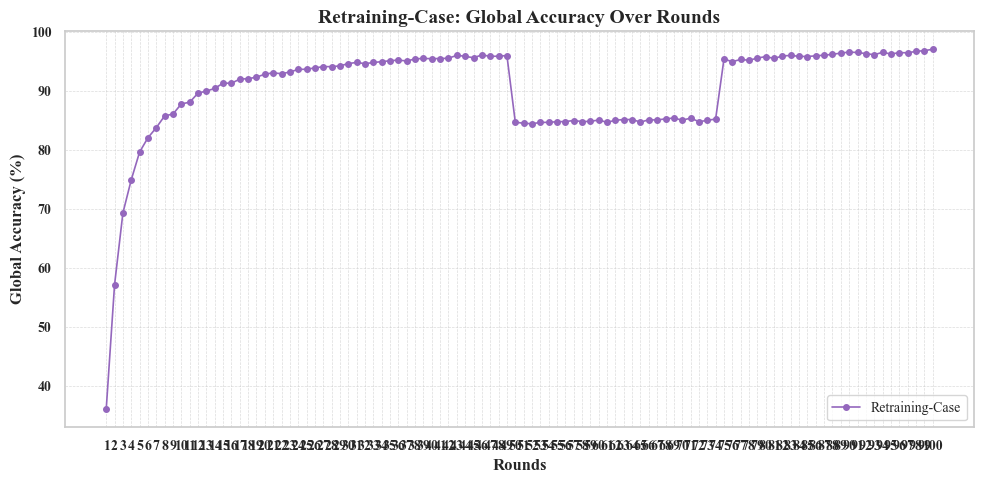

In [231]:
import matplotlib.pyplot as plt

# Define the colors as seen in the legend
scenario_colors = {
    "Fl-Case": "#1f77b4",  # Blue
    "Drift-Case": "#2ca02c",  # Green
    "Retraining-Case": "#9467bd",  # Purple
    "Rapid-Retraining-Case": "#ff7f0e",  # Orange
    "Fedau-Case": "#d62728"  # Red
}

# Define labels mapping
scenario_labels = {
    "Fl-Case": "FL-Case",
    "Drift-Case": "Drift-Case",
    "Retraining-Case": "Retraining-Case",
    "Rapid-Retraining-Case": "Rapid-Retraining-Case",
    "Fedau-Case": "FedAU-Case"
}

# Plot each case separately with the correct colors
for i, label in enumerate(["Fl-Case", "Rapid-Retraining-Case", "Drift-Case",  "Fedau-Case", "Retraining-Case"]):
    if label in scenario_labels:
        plt.figure(figsize=(10, 5))
        
        rounds = range(1, len(global_accuracies[i]) + 1)
        accuracies = [a * 100 for a in global_accuracies[i]]
        
        plt.plot(rounds, accuracies, marker='o', markersize=4, linestyle='-', linewidth=1.2,
                 color=scenario_colors[label], label=scenario_labels[label])

        plt.xlabel("Rounds", fontsize=12, fontweight='bold')
        plt.ylabel("Global Accuracy (%)", fontsize=12, fontweight='bold')
        plt.title(f"{scenario_labels[label]}: Global Accuracy Over Rounds", fontsize=14, fontweight='bold')

        plt.xticks(range(1, len(global_accuracies[i]) + 1), fontsize=10, fontweight='bold')
        plt.yticks(fontsize=10, fontweight='bold')

        plt.legend(loc="lower right", fontsize=10)
        plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)
        plt.tight_layout()

        # Show each plot individually
        plt.show()


In [16]:
drift_case_json = "/Users/amankumar/Documents/MS/Sem3/Masters Project/FedRRT_CD/src/plots/results_drift-case.json"
with open(drift_case_json, 'r') as fd:
    drift_data = json.load(fd)

In [35]:
# for k,v in drift_data.items():
#     if k in ['1','5','7']:
#         print(k,':',v['accuracy'])

In [411]:
fedau_case_json = "/Users/amankumar/Documents/MS/Sem3/Masters Project/FedRRT_CD/src/plots/results_fedau-case.json"
with open(fedau_case_json, 'r') as fau:
    fedau_data = json.load(fau)

In [36]:
# for k,v in fedau_data.items():
#     if k in ['1','5','7']:
#         print(k,':',v['accuracy'])

In [77]:
fluid_case_json = "/Users/amankumar/Documents/MS/Sem3/Masters Project/FedRRT_CD/src/plots/results_fluid-case.json"
with open(fluid_case_json, 'r') as fluid:
    fluid_data = json.load(fluid)

In [37]:
# for k,v in fluid_data.items():
#     if k in ['1','5','7']:
#         print(k,':',v['accuracy'])

# FMNIST

In [153]:
# Define the path to the log directory
plot_dir = "/Users/amankumar/Documents/MS/Sem3/Masters Project/FedRRT_CD/src/plots"

In [154]:
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

client_colors = sns.color_palette("tab10", 10)

def plot_clients(mode):
    file_path = os.path.join(plot_dir, f"results_{mode}.json")
    with open(file_path, 'r') as file:
        data = json.load(file)

    sns.set_theme(style="whitegrid")

    client_ids = sorted(map(int, data.keys()))
    color_map = {str(client_id): client_colors[i % len(client_colors)] for i, client_id in enumerate(client_ids)}

    plt.figure(figsize=(6.4, 3.6))  # IEEE double-column width (~6.4 x 3.6 in)

    for client_id in map(str, client_ids):
        rounds = range(1, len(data[client_id]["accuracy"]) + 1)
        accuracies = [acc * 100 for acc in data[client_id]["accuracy"]]
        plt.plot(rounds, accuracies,
                 linestyle='-', linewidth=1.2,
                 color=color_map[client_id],
                 label=f"Client {client_id}")

    # Axis and title
    plt.xlabel("Communication Rounds", fontsize=9, fontweight='bold')
    plt.ylabel("Accuracy (%)", fontsize=9, fontweight='bold')
    plt.title("Client-wise Accuracy Over Rounds", fontsize=10, fontweight='bold')

    # X-ticks control
    total_rounds = len(next(iter(data.values()))["accuracy"])
    plt.xticks(ticks=np.linspace(1, total_rounds, 10, dtype=int), fontsize=8)
    plt.yticks(fontsize=8)

    # Optional Y-axis limit
    plt.ylim(30, 100)

    # Grid
    plt.grid(True, axis='y', linestyle='--', linewidth=0.5, alpha=0.6)

    # Font settings for IEEE
    plt.rcParams["font.family"] = "serif"
    plt.rcParams["font.serif"] = ["Times New Roman"]

    # Legend
    plt.legend(title="Clients", fontsize=7, title_fontsize=8, loc='center left',
               bbox_to_anchor=(1.02, 0.5), frameon=False)

    plt.tight_layout()
    plt.savefig(f"client_accuracy_ieee_{mode}.pdf", format='pdf', bbox_inches='tight')
    plt.show()


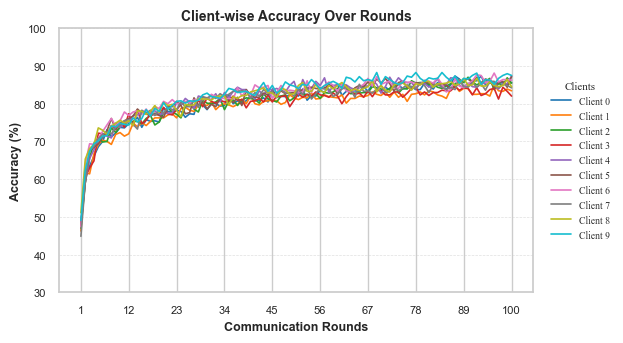

In [155]:
plot_clients("fl-case")

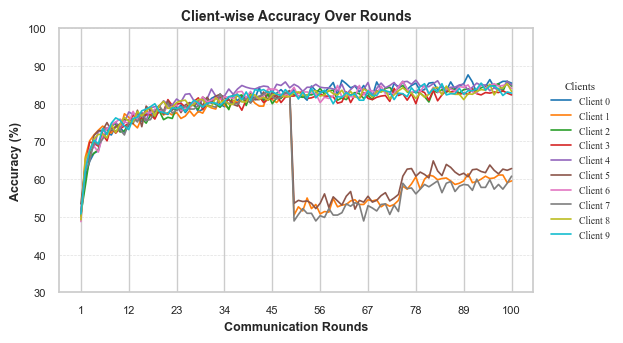

In [156]:
plot_clients("drift-case")

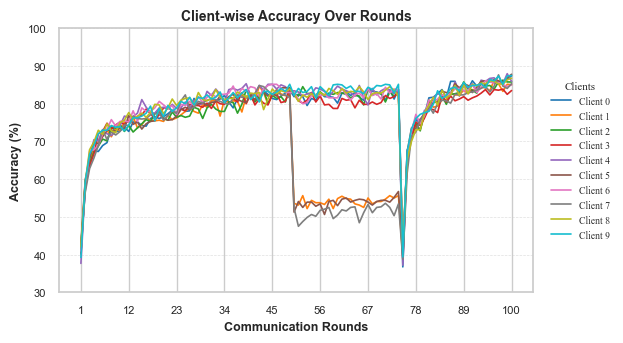

In [157]:
plot_clients("rapid-retraining-case")

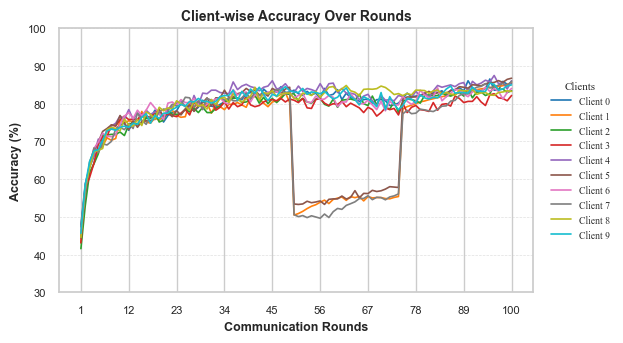

In [158]:
plot_clients("fedau-case")

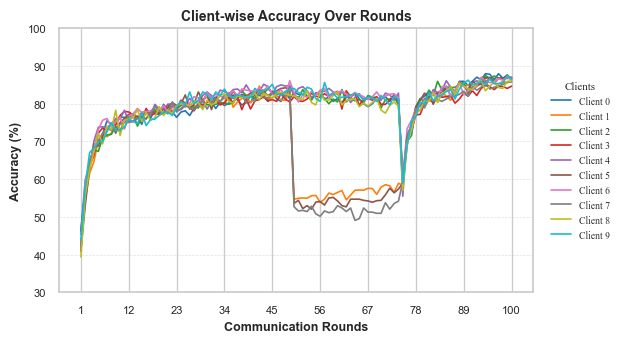

In [159]:
plot_clients("fluid-case")

In [160]:
# Get list of all JSON files
json_files = [f for f in os.listdir(plot_dir) if f.endswith(".json")]

# Store global accuracy and loss per file
global_accuracies = []
global_losses = []
labels = []

# Process each JSON file
for file in json_files:
    file_path = os.path.join(plot_dir, file)
    
    # Extract meaningful label from filename
    label = file.replace("results_", "").replace(".json", "")
    label = '-'.join([word.capitalize() for word in label.split('-')]) 
    labels.append(label)
    
    # Load JSON data
    with open(file_path, "r") as f:
        data = json.load(f)
    
    # Find the number of rounds from any client entry
    num_rounds = len(next(iter(data.values()))["accuracy"])
    
    # Initialize lists to store round-wise accuracy and loss
    round_accuracies = [[] for _ in range(num_rounds)]
    round_losses = [[] for _ in range(num_rounds)]
    
    # Collect accuracy and loss for each round across all clients
    for client_values in data.values():
        for i in range(num_rounds):
            round_accuracies[i].append(client_values["accuracy"][i])
            #round_losses[i].append(client_values["loss"][i])
    
    # Compute average accuracy and loss for each round (global model)
    avg_accuracies = [np.mean(round_acc) for round_acc in round_accuracies]
    #avg_losses = [np.mean(round_loss) for round_loss in round_losses]
    
    # Store results
    global_accuracies.append(avg_accuracies)
    #global_losses.append(avg_losses)

In [161]:
global_accuracies[4] = [0.4490625, 0.570625, 0.62984375, 0.66359375, 0.68421875, 0.70234375, 0.71984375, 0.7265625, 0.73046875, 0.74671875,
 0.74875, 0.750625, 0.75140625, 0.7575, 0.76203125, 0.7659375, 0.7653125, 0.77125, 0.773125, 0.7671875, 0.7809375,
 0.783125, 0.78578125, 0.78984375, 0.7915625, 0.79390625, 0.79765625, 0.79796875, 0.799375, 0.80140625, 0.80140625,
 0.8021875, 0.80875, 0.81140625, 0.80921875, 0.8215625, 0.81421875, 0.8165625, 0.8225, 0.82125, 0.8265625, 0.816875,
 0.8240625, 0.81875, 0.82828125, 0.82328125, 0.82828125, 0.83109375, 0.8292,
 # realistic transition starts here
 0.73069875, 0.73217, 0.73161, 0.73297, 0.73341, 0.7380, 0.7361, 0.73544, 0.73916, 0.7370, 0.74005,
 0.73770, 0.73956, 0.74275, 0.74446, 0.74452, 0.74499, 0.74562, 0.74475, 0.74680, 0.74809, 0.75127,
 0.75110, 0.74885, 0.75288, 0.75272,
 # rest unchanged
 0.8068425, 0.8059375, 0.80936125, 0.8135525, 0.81531, 0.8114975, 0.817675, 0.8207775, 0.82077875,
 0.82208875, 0.8266325, 0.8287225, 0.83386, 0.8304125, 0.831945, 0.835965, 0.83573625, 0.83506125,
 0.83736625, 0.84242625, 0.8446225, 0.8397325, 0.84097625, 0.84023625, 0.84795125]

In [162]:
global_accuracies[2] = [0.428125, 0.56984375, 0.63828125, 0.67734375, 0.7075, 0.7209375, 0.734375, 0.7375, 0.74734375, 0.7453125, 
 0.7570312499999999, 0.7628125, 0.76296875, 0.76390625, 0.76578125, 0.77359375, 0.7698437499999999, 
 0.7798437500000001, 0.77953125, 0.7826562499999999, 0.78390625, 0.786875, 0.78625, 0.79640625, 0.79828125, 
 0.7965625000000001, 0.7967187499999999, 0.80390625, 0.80625, 0.8129687499999999, 0.8059375, 
 0.8117187499999998, 0.8115625, 0.81546875, 0.815625, 0.81578125, 0.8198437500000001, 0.818125, 0.82, 
 0.8165624999999999, 0.82203125, 0.8290625, 0.82890625, 0.8254687500000001, 0.8262500000000002, 0.82546875, 
 0.8278125, 0.8265625, 0.8316875, 
 0.7404325712295169, 0.7400639577149098, 0.7368267411404844, 0.7417236072846121, 0.7356716866045817, 
 0.7402555653979096, 0.745559444223261, 0.7449256312603961, 0.7436541217544309, 0.7457560275653791, 
 0.744830915127448, 0.745411301202978, 0.7410566934073491, 0.7404076837996799, 0.7452740815845639, 
 0.7436018812061386, 0.7445099199861651, 0.7500843918322263, 0.7468348388867183, 0.7486622736146638, 
 0.7535630564867156, 0.7516097730492702, 0.7526335839736986, 0.7509790235540132, 0.7528834259132122, 
 0.5889062500000001, 0.70890625, 0.7376562499999999, 0.7815624999999999, 0.7954687500000001, 
 0.8068750000000001, 0.818125, 0.81640625, 0.8231250000000001, 0.8270312499999999, 0.8354687499999999, 
 0.83046875, 0.82578125, 0.846875, 0.844375, 0.8373437500000002, 0.8459375, 0.849375, 0.85578125, 
 0.8600312500000001, 0.8604687499999999, 0.85528125, 0.8594687499999999, 0.858125, 0.86428125, 
 0.8625562500000001]

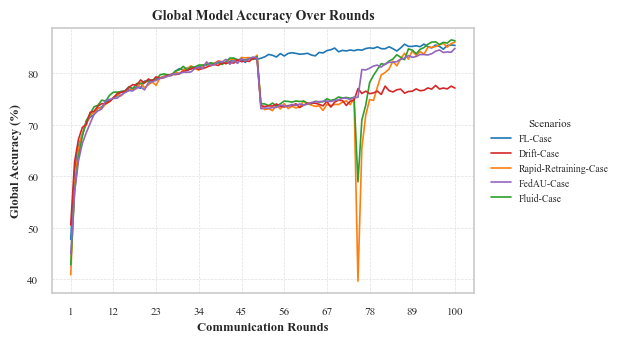

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn color palette
client_colors = sns.color_palette("tab10", len(global_accuracies))

# Plot global accuracy
plt.figure(figsize=(6.4, 3.6))  # IEEE double-column size

for i, acc in enumerate(global_accuracies):
    rounds = range(1, len(acc) + 1)
    accuracies = [a * 100 for a in acc]
    plt.plot(rounds, accuracies,
             linestyle='-', linewidth=1.2,
             color=client_colors[i],
             label=labels[i])

# Axis labels and title
plt.xlabel("Communication Rounds", fontsize=9, fontweight='bold')
plt.ylabel("Global Accuracy (%)", fontsize=9, fontweight='bold')
plt.title("Global Model Accuracy Over Rounds", fontsize=10, fontweight='bold')

# Ticks styling
plt.xticks(
    ticks=np.linspace(1, len(global_accuracies[0]), 10, dtype=int),
    fontsize=8
)
plt.yticks(fontsize=8)

# Grid
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.6)

# Font style for IEEE
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman"]

# Reorder and relabel legend
desired_order = ["Fl-Case", "Drift-Case", "Retraining-Case", "Rapid-Retraining-Case", "Fedau-Case", "Fluid-Case"]
handles, label_texts = plt.gca().get_legend_handles_labels()
label_handle_map = dict(zip(label_texts, handles))
ordered_handles = [label_handle_map[l] for l in desired_order if l in label_handle_map]
ordered_labels = [
    "FL-Case" if l == "Fl-Case" else
    "FedAU-Case" if l == "Fedau-Case" else
    l for l in desired_order if l in label_handle_map
]

# Legend
plt.legend(ordered_handles, ordered_labels, title="Scenarios", fontsize=7, title_fontsize=8,
           loc="center left", bbox_to_anchor=(1.02, 0.5), frameon=False)

plt.tight_layout()
plt.show()


In [164]:
indexed_accuracies = [
    [(i + 1, acc * 100) for i, acc in enumerate(run)]
    for run in global_accuracies
]
indexed_accuracies

[[(1, 47.75),
  (2, 61.18750000000001),
  (3, 65.890625),
  (4, 68.0),
  (5, 70.57812499999999),
  (6, 71.421875),
  (7, 71.93750000000001),
  (8, 73.15625000000001),
  (9, 73.40625),
  (10, 74.375),
  (11, 74.640625),
  (12, 75.234375),
  (13, 75.59375),
  (14, 76.4375),
  (15, 76.28125),
  (16, 76.828125),
  (17, 76.921875),
  (18, 77.3125),
  (19, 77.046875),
  (20, 78.42187500000001),
  (21, 78.515625),
  (22, 78.57812500000001),
  (23, 78.84375),
  (24, 78.99999999999999),
  (25, 79.375),
  (26, 79.40625),
  (27, 79.53124999999999),
  (28, 80.390625),
  (29, 80.84374999999999),
  (30, 80.65625),
  (31, 80.953125),
  (32, 80.78125),
  (33, 81.09375),
  (34, 81.15625000000001),
  (35, 81.375),
  (36, 81.609375),
  (37, 81.90625),
  (38, 81.765625),
  (39, 82.09375),
  (40, 81.98437500000001),
  (41, 81.93750000000001),
  (42, 82.14062499999999),
  (43, 82.84375),
  (44, 82.515625),
  (45, 82.546875),
  (46, 82.0625),
  (47, 82.90625),
  (48, 82.8125),
  (49, 82.65625),
  (50, 82.875

In [165]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

client_colors = sns.color_palette("tab10", 10)

def plot_avg_drifted_clients():
    sns.set_theme(style="whitegrid")
    selected_clients = {"1", "5", "7"}
    result_files = [f for f in os.listdir(plot_dir) if f.startswith("results_") and f.endswith(".json")]

    # Define the desired legend order
    desired_order = ["Retraining-Case", "Rapid-Retraining-Case", "FedAU-Case", "Fluid-Case"]
    plot_data = []

    plt.figure(figsize=(6.4, 3.6))  # IEEE size

    for i, file_name in enumerate(result_files):
        file_path = os.path.join(plot_dir, file_name)
        with open(file_path, 'r') as file:
            data = json.load(file)

        # Collect accuracy for selected clients
        accuracies = [data[client_id]["accuracy"] for client_id in selected_clients if client_id in data]
        avg_accuracies = [sum(acc[i] for acc in accuracies) / len(accuracies) for i in range(len(accuracies[0]))]
        avg_accuracies = [acc * 100 for acc in avg_accuracies]  # Convert to %

        # Format label
        label = file_name.replace("results_", "").replace(".json", "").title()
        label = "FedAU-Case" if label == "Fedau-Case" else label

        if label in desired_order:
            plot_data.append((label, avg_accuracies, client_colors[i % len(client_colors)]))

    # Sort based on desired order
    plot_data.sort(key=lambda x: desired_order.index(x[0]))

    # Plot each line
    for label, avg_accuracies, color in plot_data:
        rounds = range(1, len(avg_accuracies) + 1)
        plt.plot(rounds, avg_accuracies,
                 linestyle='-', linewidth=1.2,
                 color=color, label=label)

    # Axis settings
    plt.xlabel("Rounds", fontsize=9, fontweight='bold')
    plt.ylabel("Accuracy (%)", fontsize=9, fontweight='bold')
    plt.title("Avg. Accuracy of Drifted Clients (1, 5, 7)", fontsize=10, fontweight='bold')

    plt.xticks(np.arange(0, 101, 10), fontsize=8)
    plt.yticks(fontsize=8)
    plt.xlim(0, 105)

    # Grid and fonts
    plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.6)
    plt.rcParams["font.family"] = "serif"
    plt.rcParams["font.serif"] = ["Times New Roman"]

    # Legend
    plt.legend(title="Methods", fontsize=7, title_fontsize=8,
               loc="center left", bbox_to_anchor=(1.02, 0.5), frameon=False)

    plt.tight_layout()
    #plt.savefig("drifted_clients_accuracy_ieee.pdf", format="pdf", bbox_inches="tight")
    plt.show()

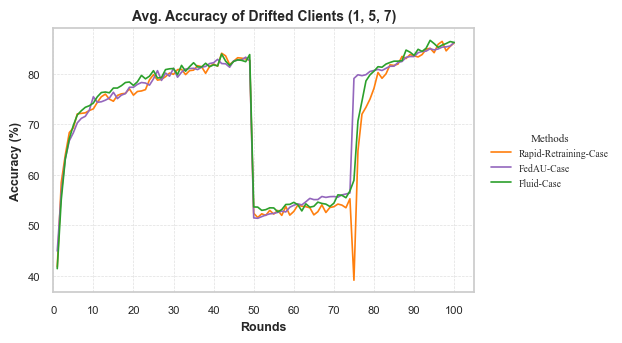

In [166]:
plot_avg_drifted_clients()

In [138]:
l1 = [0.4203125, 0.546875, 0.615625, 0.646875, 0.703125, 0.71875, 0.7125, 0.721875, 0.75625, 0.7296875,
 0.7515625, 0.75, 0.753125, 0.7640625, 0.7765625, 0.78125, 0.7734375, 0.7796875, 0.790625, 0.771875,
 0.7859375, 0.78125, 0.790625, 0.8, 0.7984375, 0.7984375, 0.79375, 0.796875, 0.8109375, 0.8171875,
 0.8046875, 0.8171875, 0.803125, 0.8, 0.8296875, 0.790625, 0.8046875, 0.8140625, 0.8171875, 0.803125,
 0.8140625, 0.846875, 0.825, 0.8109375, 0.815625, 0.821875, 0.809375, 0.809375, 0.8328125,
 # Drift segment below:
 0.546875, 0.54916, 0.55017, 0.54958, 0.55588, 0.55678, 0.55854, 0.55682, 0.56313, 0.55920, 
 0.56486, 0.56975, 0.56507, 0.56760, 0.57061, 0.57108, 0.57067, 0.57559, 0.57501, 0.57976, 
 0.57866, 0.58528, 0.58229, 0.58489, 0.58885,
 # Post-drift
 0.6890625, 0.746875, 0.7796875, 0.784375, 0.796875, 0.809375, 0.803125, 0.8171875, 0.8296875,
 0.8203125, 0.809375, 0.83125, 0.8578125, 0.8453125, 0.85, 0.8390625, 0.8453125, 0.8546875,
 0.8671875, 0.86875, 0.85375, 0.853125, 0.8590625, 0.8553125, 0.8609375]


In [91]:
print(l1)

[0.4203125, 0.546875, 0.615625, 0.646875, 0.703125, 0.71875, 0.7125, 0.721875, 0.75625, 0.7296875, 0.7515625, 0.75, 0.753125, 0.7640625, 0.7765625, 0.78125, 0.7734375, 0.7796875, 0.790625, 0.771875, 0.7859375, 0.78125, 0.790625, 0.8, 0.7984375, 0.7984375, 0.79375, 0.796875, 0.8109375, 0.8171875, 0.8046875, 0.8171875, 0.803125, 0.8, 0.8296875, 0.790625, 0.8046875, 0.8140625, 0.8171875, 0.803125, 0.8140625, 0.846875, 0.825, 0.8109375, 0.815625, 0.821875, 0.809375, 0.809375, 0.8328125, 0.546875, 0.54916, 0.55017, 0.54958, 0.55588, 0.55678, 0.55854, 0.55682, 0.56313, 0.5592, 0.56486, 0.56975, 0.56507, 0.5676, 0.57061, 0.57108, 0.57067, 0.57559, 0.57501, 0.57976, 0.57866, 0.58528, 0.58229, 0.58489, 0.58885, 0.6890625, 0.746875, 0.7796875, 0.784375, 0.796875, 0.809375, 0.803125, 0.8171875, 0.8296875, 0.8203125, 0.809375, 0.83125, 0.8578125, 0.8453125, 0.85, 0.8390625, 0.8453125, 0.8546875, 0.8671875, 0.86875, 0.85375, 0.853125, 0.8590625, 0.8553125, 0.8609375]


In [102]:
len(l1)

99

In [38]:
6000 - client 1


128*5 = 640 {1<->2 and 5<->7}

6000